# Advanced Network Management - Assignment 1

## Tasks

#### 1) Calculate the average SRT of every 10 minutes, and plot the SRT with a line chart (x axis for date time and y axis for the average SRT).

#### 2) Calculate the average of each SRT component of every 10 minute, and plot the four SRT components together with a stacked area chart (x axis for date time and y axis for time) and also a 100% stacked area chart (y axis for the percentage).

#### 3) Plot the CDF (Cumulative distribution function) chart of SRT.

#### 4) Plot the CDF chart of #Images.

#### 5) Count the number of queries (also called page views or PVs) of each minute, and plot the minute-level PVs with a line chart (x axis for date time and y axis for the PVs).

#### 6) Count the PVs of each province, and plot it with a histogram chart (x axis for province and y axis for PVs).

#### 7) Count the PVs of each UA, and plot it with a pie chart (show the percentages in the chart).

#### 8) What are the differences among those charts (How to decide which one to use)

#### 9) Describe your experience or findings in doing those jobs. For example, experience of processing the data, observations from the charts, characteristics of the data, potential explanations, and any interesting things you would like to mention.

## Dataset

####  [Dropbox](https://www.dropbox.com/s/akef557hnla0h9v/ANM-data.zip?dl=0) / [Tsinghua Cloud](https://cloud.tsinghua.edu.cn/f/c8806b4c81ee45afa03c/?dl=1)

### Preliminary preparations

In [1]:
import glob, os
import matplotlib

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.dates as mdates

import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['timezone'] = 'Asia/Shanghai'

csv_files = glob.glob("dataset/*.csv")

def sort_file_name(filename):
    return int(os.path.basename(filename)[:-4])

csv_files.sort(key=sort_file_name)

dataset = []
for file in csv_files:
    content = pd.read_csv(file)
    dataset.append(content)
dataset = pd.concat(dataset, axis=0, ignore_index=True)

In [2]:
d = dataset.copy()
start_time= d.iloc[0]['Timestamp']
time_diff = d['Timestamp'] - start_time
d['period'] = time_diff// 600


temp = d.groupby(['period'])[["Timestamp", "Tnet", "Tbrowser", "Tserver", "Tother", "SRT"]].mean()
temp['time'] = pd.to_datetime(temp['Timestamp'], unit='s')
temp['date'] = temp['time'].dt.date

### Task 1

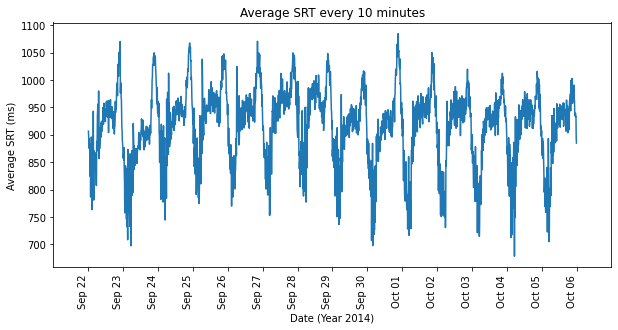

In [3]:
def get_dates():
    start = pd.Timestamp('2014-09-22',tz='Asia/Shanghai')
    end = pd.Timestamp('2014-10-06',tz='Asia/Shanghai')
    dates = []
    
    time_diff = end - start
    for i in range(time_diff.days + 1):
        new_date = start + pd.Timedelta(days=i)
        dates.append(new_date)
    return dates

fig, ax = plt.subplots()
temp.plot( x='time', y='SRT', kind='line', legend=False, title="Average SRT every 10 minutes", figsize= (10, 5), ax=ax)
ax.set_xlabel("Date (Year 2014)")
ax.set_ylabel("Average SRT (ms)")
ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlim(pd.Timestamp('2014-09-21',tz='Asia/Shanghai'), pd.Timestamp('2014-10-07',tz='Asia/Shanghai'))
dates = get_dates()
plt.xticks(dates, rotation = 90)


plt.show()

fig = ax.get_figure()
fig.savefig("figure_1", dpi=300)

### Task 2

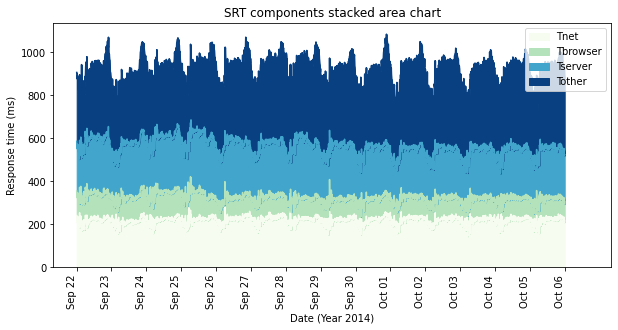

In [4]:

ax = temp.plot.area(x='time', y=["Tnet", "Tbrowser", "Tserver", "Tother"],title="SRT components stacked area chart", colormap="GnBu", figsize= (10, 5))
ax.set_xlabel("Date (Year 2014)")
ax.set_ylabel("Response time (ms)")
ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlim(pd.Timestamp('2014-09-21'), pd.Timestamp('2014-10-07'))
plt.xticks(dates, rotation = 90)
plt.show()

fig = ax.get_figure()
fig.savefig("figure_2", dpi=300)

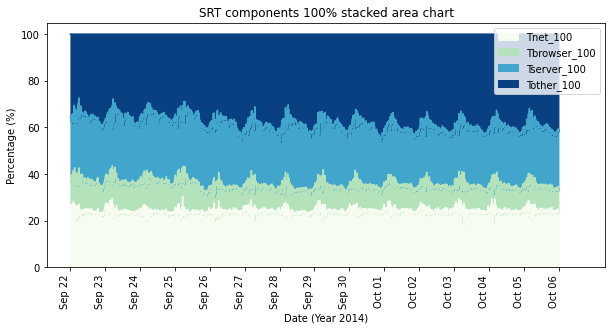

In [5]:
for col in ["Tnet", "Tbrowser", "Tserver", "Tother"]:
    temp[col+'_100'] = (temp[col]/temp['SRT'])*100

ax = temp.plot.area(x='time', y=["Tnet_100", "Tbrowser_100", "Tserver_100", "Tother_100"],title="SRT components 100% stacked area chart", colormap="GnBu", figsize= (10, 5))
ax.set_xlabel("Date (Year 2014)")
ax.set_ylabel("Percentage (%)")
ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlim(pd.Timestamp('2014-09-21'), pd.Timestamp('2014-10-07'))
plt.xticks(dates, rotation = 90)
plt.show()

fig = ax.get_figure()
fig.savefig("figure_3", dpi=300)


### Task 3

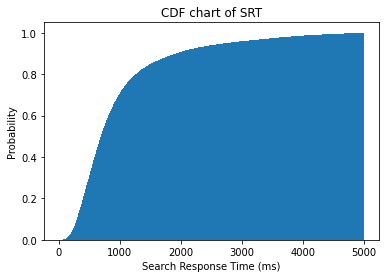

In [6]:
fig, ax = plt.subplots()
dataset.hist(column="SRT", cumulative=True, density=1, bins=1000, figsize=(10,8), ax=ax)
ax.set_title('CDF chart of SRT')
ax.set_xlabel("Search Response Time (ms)")
ax.set_ylabel("Probability")
ax.grid(False)
plt.show()

fig.savefig("figure_4", dpi=300)

### Task 4

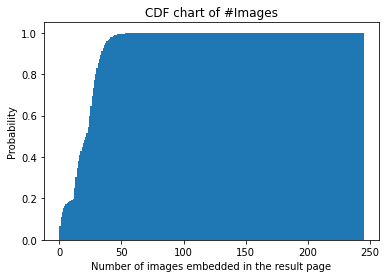

In [7]:
fig, ax = plt.subplots()
dataset.hist(column="#Images", cumulative=True, density=1, bins=1000, figsize=(10,8), ax=ax)
ax.set_title('CDF chart of #Images')
ax.set_xlabel("Number of images embedded in the result page")
ax.set_ylabel("Probability")
ax.grid(False)
plt.show()

fig.savefig("figure_5", dpi=300)

### Task 5

In [8]:
d = dataset.copy()
start_time= d.iloc[0]['Timestamp']
time_diff = d['Timestamp'] - start_time
d['period'] = time_diff// 60

temp1 = d.groupby(['period']).agg(count=('period', 'size'), Timestamp =('Timestamp', 'mean')).reset_index()

temp1['time'] = pd.to_datetime(temp1['Timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('Asia/Shanghai')
temp1['date'] = temp1['time'].dt.date


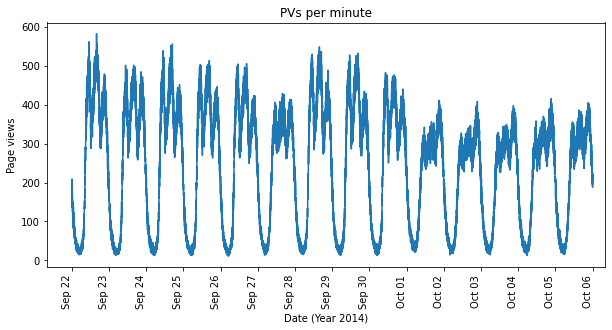

In [9]:
ax = temp1.plot(x='time', y='count', kind='line', legend=False, title="PVs per minute", figsize= (10, 5))
ax.set_xlabel("Date (Year 2014)")
ax.set_ylabel("Page views")
ax.get_xaxis().set_major_formatter(mdates.DateFormatter('%b %d'))
ax.set_xlim(pd.Timestamp('2014-09-21'), pd.Timestamp('2014-10-06'))
plt.xticks(dates, rotation = 90)

plt.show()

fig = ax.get_figure()
fig.savefig("figure_6", dpi=300)

### Task 6

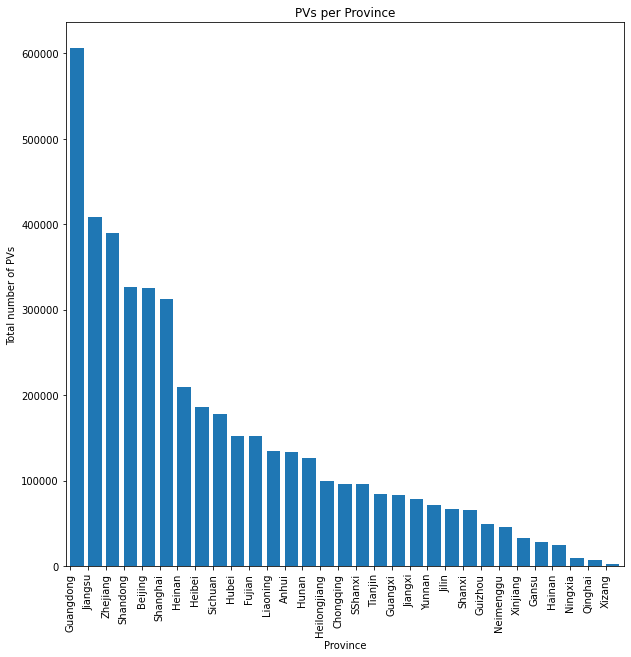

In [10]:
fig, ax = plt.subplots()
mask = dataset['Province'].isin(['None'])
te = dataset[~mask]
tt=te.groupby(['Province']).agg(count=('Province', 'size'), province=("Province", "first")).sort_values('count', ascending=False)

tt.plot(x='province', y="count", kind="bar", legend=False, title="Average SRT every 10 minutes", figsize= (10, 10), width=0.75, ax=ax,align='edge')

ax.set_title('PVs per Province')
ax.set_xlabel("Province")
ax.set_ylabel("Total number of PVs")
ax.grid(False)
plt.xticks(rotation = 90)
plt.show()

fig.savefig("figure_7", dpi=300)

### Task 7

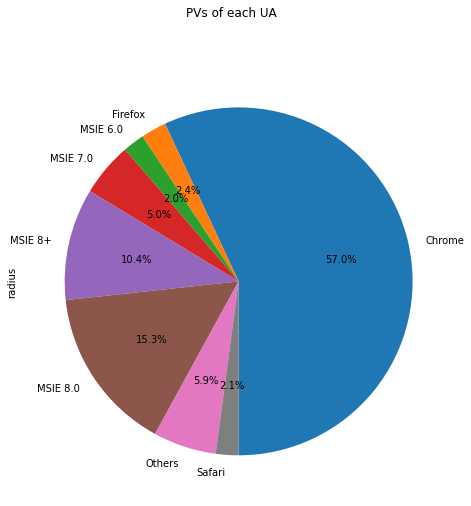

In [11]:
p = dataset.groupby(['UA']).agg(radius=('UA', 'count'), UA=('UA', 'first'))
pie = p.plot.pie(y='radius', figsize=(8,8), subplots=True, autopct='%1.1f%%', startangle=270, title='PVs of each UA', legend=False)
plt.show()

fig = pie[0].get_figure()
fig.savefig("figure_8.png", dpi=300)